In [65]:
import os
os.chdir('/Code/ditto_v2')
%pwd

'c:\\Code\\ditto_v2'

## Loading Results

In [334]:
import geopandas as gpd
# path='./gdf_sued_germany.json'
path='./gdf_sued_germany2.json'
gdf = gpd.read_file(path).to_crs(4326)

In [335]:
gdf = gdf.sort_values(by='EWZ_int',ascending=False)
gdf.shape

(153, 15)

In [336]:
path_census_D2 = './assets/Geo/Germany/D1_Deutschland_census.json'
# gdf_census_merged = merge_census_geom(d_ger['census'], is_logging=is_logging)
# gdf_census_merged.to_file(path_census_D2)
gdf_census = gpd.read_file(path_census_D2).to_crs(4326)
gdf_census

,Bundesland,EWZ,area_dbms,area_geom,geometry
0,Schleswig-Holstein,2953270,15254,15624.87,"MULTIPOLYGON (((8.93016 53.91648, 8.9309 53.91..."
1,Hamburg,1892122,755,742.55,"MULTIPOLYGON (((9.75824 53.55644, 9.75984 53.5..."
2,Niedersachsen,8140242,47241,47661.54,"MULTIPOLYGON (((7.23817 52.264, 7.23681 52.264..."
3,Bremen,684864,419,402.48,"MULTIPOLYGON (((8.51135 53.22795, 8.51264 53.2..."
4,Nordrhein-Westfalen,18139116,33921,34110.72,"MULTIPOLYGON (((6.38501 50.38419, 6.38684 50.3..."
5,Hessen,6391360,20895,21114.92,"MULTIPOLYGON (((8.37035 49.86278, 8.36813 49.8..."
6,Rheinland-Pfalz,4159150,18715,19856.54,"POLYGON ((6.41666 49.54395, 6.41432 49.54326, ..."
7,Baden-Württemberg,11280257,35219,35748.88,"MULTIPOLYGON (((7.71191 47.5388, 7.71067 47.53..."
8,Bayern,13369393,69430,70544.94,"POLYGON ((9.6502 47.55793, 9.6492 47.55843, 9...."
9,Saarland,992666,2545,2571.02,"POLYGON ((6.83629 49.21126, 6.8371 49.2108, 6...."


In [338]:
# gs_bayern = gdf_census[gdf_census['Bundesland'] == 'Bayern'].geometry#.values[0]
# gdf_bayern = gs_bayern.to_frame(name='geometry').set_crs(epsg=4326)
# gdf_join = gpd.sjoin(gdf, gdf_bayern, how="inner", predicate="intersects")

# if gdf_join.shape[0] > 0:
#     print(f' Bayern={gdf_join.shape[0]}')
#     gdf.loc[gdf['store_name'].isin(gdf_join['store_name']), 'BL'] = [['Bayern']] #gdf.loc[gdf['store_name'].isin(gdf_join['store_name']), 'BL']  + ',' + 'Bayern'


# geo1 = gdf_census[gdf_census['Bundesland'] == 'Bayern'].geometry.values[0]
# geo1
# geo2 = gdf.iloc[0].geometry
# geo2

# Adding a new column with empty lists
gdf['BL'] = [[] for _ in range(len(gdf))]
gdf.head()

,area_geom,area_geom_int,EWZ,EWZ_int,KFL,KFL_int,perc_data,perc_geom,GEN,area,PERC_geom_int,PERC_dbms_int,PERC_pop,store_name,geometry,BL
22,1941.07,1258.44,2322920,2149785,1906,1234.42,0.65,0.65,München,1258.34,0.648,0.648,0.925,decathlon_München-Elisenhof am Hauptbahnhof,"POLYGON ((11.43609 47.98273, 11.41345 47.99178...",[]
18,1823.39,1258.35,2331984,2137101,1790,1234.83,0.69,0.69,München,1258.35,0.690,0.690,0.916,decathlon_München-Mona am OEZ,"POLYGON ((11.44665 48.01186, 11.43286 48.01515...",[]
110,1878.48,1258.44,2266310,2124581,1846,1234.24,0.67,0.67,München,1258.34,0.670,0.669,0.937,intersport_81241-muenchen-intersport-siebzehnr...,"POLYGON ((11.33749 47.98954, 11.31588 47.99817...",[]
4,1959.17,1258.38,2352483,2075326,1925,1235.14,0.64,0.64,München,1258.35,0.642,0.642,0.882,decathlon_München Unterföhring,"POLYGON ((11.58405 48.00082, 11.56196 48.00451...",[]
120,1851.78,1258.16,2246651,1978761,1818,1234.35,0.68,0.68,München,1258.33,0.680,0.679,0.881,intersport_82152-planegg-intersport-haindl,"POLYGON ((11.26134 47.95875, 11.24915 47.96478...",[]


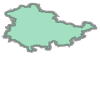

In [339]:
geom_bl

In [340]:
import numpy as np
# gdf.loc[:, 'BL'] = []

for i,(index,row) in enumerate(gdf_census.iterrows()):
    print(f'[{i+1}/{gdf_census.shape[0]}] Row={row.Bundesland}')
    geom_bl = row.geometry

    gs_bl = gpd.GeoSeries([row.geometry])
    gdf_bl = gs_bl.to_frame(name='geometry').set_crs(epsg=4326)
    gdf_join = gpd.sjoin(gdf, gdf_bl, how="inner", predicate="intersects")
    if gdf_join.shape[0] > 0:
        print(f' {row.Bundesland}={gdf_join.shape[0]}')
        gdf.loc[gdf['store_name'].isin(gdf_join['store_name']), 'BL'].apply(lambda x: x.append(row.Bundesland))
    
        # gdf.loc[gdf['store_name'].isin(gdf_join['store_name']),f'intersection_{row.Bundesland}']= gdf.geometry.apply(lambda row: geom_bl.intersection(row))

    # gdf['contains']= gdf.geometry.apply(lambda row: geom_bl.contains(row) )
    # if row.Bundesland == 'Bayern':
    # gdf.loc[gdf['contains']==True, 'BL'] = row.Bundesland
    # gdf =  gdf[gdf['contains'] == True, row.Bundesland, None))
    
        
    # gdf.loc[gdf['is_within'] == True,'Bundesland'] = row.Bundesland
    # gdf.loc[gdf['intersection'] == True,'Bundesland'] = row.Bundesland
gdf

[1/16] Row=Schleswig-Holstein
[2/16] Row=Hamburg
[3/16] Row=Niedersachsen
[4/16] Row=Bremen
[5/16] Row=Nordrhein-Westfalen
[6/16] Row=Hessen
 Hessen=8
[7/16] Row=Rheinland-Pfalz
 Rheinland-Pfalz=6
[8/16] Row=Baden-Württemberg
 Baden-Württemberg=89
[9/16] Row=Bayern
 Bayern=83
[10/16] Row=Saarland
[11/16] Row=Berlin
[12/16] Row=Brandenburg
[13/16] Row=Mecklenburg-Vorpommern
[14/16] Row=Sachsen
[15/16] Row=Sachsen-Anhalt
[16/16] Row=Thüringen
 Thüringen=2


,area_geom,area_geom_int,EWZ,EWZ_int,KFL,KFL_int,perc_data,perc_geom,GEN,area,PERC_geom_int,PERC_dbms_int,PERC_pop,store_name,geometry,BL
22,1941.07,1258.44,2322920,2149785,1906,1234.42,0.65,0.65,München,1258.34,0.648,0.648,0.925,decathlon_München-Elisenhof am Hauptbahnhof,"POLYGON ((11.43609 47.98273, 11.41345 47.99178...",[Bayern]
18,1823.39,1258.35,2331984,2137101,1790,1234.83,0.69,0.69,München,1258.35,0.690,0.690,0.916,decathlon_München-Mona am OEZ,"POLYGON ((11.44665 48.01186, 11.43286 48.01515...",[Bayern]
110,1878.48,1258.44,2266310,2124581,1846,1234.24,0.67,0.67,München,1258.34,0.670,0.669,0.937,intersport_81241-muenchen-intersport-siebzehnr...,"POLYGON ((11.33749 47.98954, 11.31588 47.99817...",[Bayern]
4,1959.17,1258.38,2352483,2075326,1925,1235.14,0.64,0.64,München,1258.35,0.642,0.642,0.882,decathlon_München Unterföhring,"POLYGON ((11.58405 48.00082, 11.56196 48.00451...",[Bayern]
120,1851.78,1258.16,2246651,1978761,1818,1234.35,0.68,0.68,München,1258.33,0.680,0.679,0.881,intersport_82152-planegg-intersport-haindl,"POLYGON ((11.26134 47.95875, 11.24915 47.96478...",[Bayern]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1989.37,1258.66,149418,87278,1969,1245.11,0.63,0.63,Blaufelden,1258.70,0.633,0.632,0.584,intersport_91541-rothenburg-intersport-huebsch,"POLYGON ((10.13021 49.2007, 10.12585 49.20141,...","[Baden-Württemberg, Bayern]"
146,1093.73,810.23,91521,69575,1071,790.67,0.74,0.74,Bad Bocklet,810.20,0.741,0.738,0.760,intersport_97638-mellrichstadt-intersport-stue...,"POLYGON ((10.10138 50.2988, 10.10054 50.29938,...","[Hessen, Bayern, Thüringen]"
86,1448.56,769.76,123656,65750,1437,763.31,0.53,0.53,Garmisch-Partenkirchen,769.72,0.531,0.531,0.532,intersport_87629-fuessen-intersport-keller,"MULTIPOLYGON (((10.45367 47.55414, 10.45328 47...",[Bayern]
88,997.12,637.80,90974,59108,986,629.57,0.64,0.64,Schneizlreuth,637.86,0.640,0.639,0.650,intersport_83242-reit-im-winkl-intersport-rent,"POLYGON ((12.4425 47.68948, 12.44248 47.69011,...",[Bayern]


In [347]:
gdf['store'] = gdf['store_name'].str.split('_').str[0]

In [352]:
gdf[gdf['store_name'] == 'decathlon_Schwetzingen'].head(5)

,area_geom,area_geom_int,EWZ,EWZ_int,KFL,KFL_int,perc_data,perc_geom,GEN,area,PERC_geom_int,PERC_dbms_int,PERC_pop,store_name,geometry,BL,store
11,1052.68,897.56,995376,905341,1029,876.86,0.85,0.85,Waghäusel,897.57,0.853,0.852,0.91,decathlon_Schwetzingen,"POLYGON ((8.57783 49.2143, 8.55084 49.21516, 8...","[Hessen, Rheinland-Pfalz, Baden-Württemberg]",decathlon


In [361]:
import plotly.express as px

# Create the treemap
fig = px.treemap(gdf, path=[px.Constant("all"),'store','store_name'], 
                 values='EWZ',
                 title="Stores serving largest populations")

# fig = px.treemap(gdf, path=[px.Constant("all"), 'store_name'], 
#                  values='EWZ_int',
#                  title="Stores serving largest populations")
# fig = px.treemap(gdf.explode('BL'), path=[px.Constant("all"), 'store','BL','store_name'], 
#                  values='EWZ_int',
#                  title="Stores serving largest populations")
fig.show()

In [298]:

# Create a data frame with fake data
data = {'labels': ["A", "B", "C", "D", "E", "F", "G"], 'values': [10, 20, 25, 35, 10, 25, 45]}
df = pd.DataFrame(data)

# Create the treemap
fig = px.treemap(df, path=[px.Constant("all"), 'labels'], values='values')
fig.show()

In [251]:
df['C'] = [[]]

In [252]:
df

,A,B,C
0,[],1,[]


In [235]:
df.loc[0,'A'].append(2)
df.loc[0,'A'].append(3)
df

,A,B
0,"[2, 3]",1


In [13]:
import plotly.express as px
import pandas as pd

# Create the bar chart
fig = px.bar(gdf.sort_values(by='EWZ_int',ascending=False), x='store_name', y='EWZ_int')
# Display the plot
fig.show()